In [22]:
import dgl
import torch
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [23]:
networks = torch.nn.ModuleList([
    dgl.nn.RelGraphConv(in_feat=4, out_feat=4, num_rels=4) for _ in range(4)
])
scoring = torch.nn.Linear(4, 1)
models = torch.nn.ModuleList([networks, scoring])
h0 = torch.randn((3, 4))
optimizer = torch.optim.Adam(models.parameters(), lr=1e-3)

In [24]:
g = dgl.graph((
    [0, 1, 0, 2],
    [1, 0, 2, 0]
))
rel = torch.tensor([0, 1, 2, 3])

In [25]:
def get_score():
    h = h0
    for nn in networks:
        h = torch.relu(nn(g, h, rel))
    return scoring(h).softmax(dim=0)

In [26]:
def get_reward(action):
    rewards = [1, 2, 1]
    return rewards[action]

In [31]:
probs = []
for _ in tqdm.trange(100):
    prob = get_score()
    probs.append(prob.detach())
    action = np.random.choice(range(3), p=prob.detach().numpy().reshape(-1))
    reward = get_reward(action)
    loss = - reward * prob[action] / prob[action].detach()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

100%|██████████| 100/100 [00:42<00:00,  2.37it/s]


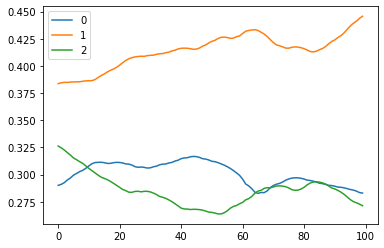

In [32]:
probs_l = zip(*probs)
for i, prob in enumerate(probs_l):
    plt.plot(prob, label=i)
plt.legend()

In [47]:
FEATURE_DIM = 4
NODE_TYPES_CNT = 4
h0 = torch.randn((NODE_TYPES_CNT, FEATURE_DIM))
node_types = torch.tensor([
    d[type]
for type in [
    "S",
    "S+1",
    "S+2",
    "S",
    "X"
]])

In [46]:
d = dict([(a, b) for b, a in enumerate(["S", "S+1", "S+2", "S-1", "S-2", "X", "Y", "Z"])])